In [5]:
## from OpenCV Samples https://github.com/opencv/opencv/blob/master/samples/python/gabor_threads.py

from __future__ import print_function

import numpy as np
import cv2 as cv
from multiprocessing.pool import ThreadPool

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

In [4]:
def process_threaded(img, filters, threadn = 8):
    accum = np.zeros_like(img)
    def f(kern):
        return cv.filter2D(img, cv.CV_8UC3, kern)
    pool = ThreadPool(processes=threadn)
    for fimg in pool.imap_unordered(f, filters):
        np.maximum(accum, fimg, accum)
    return accum

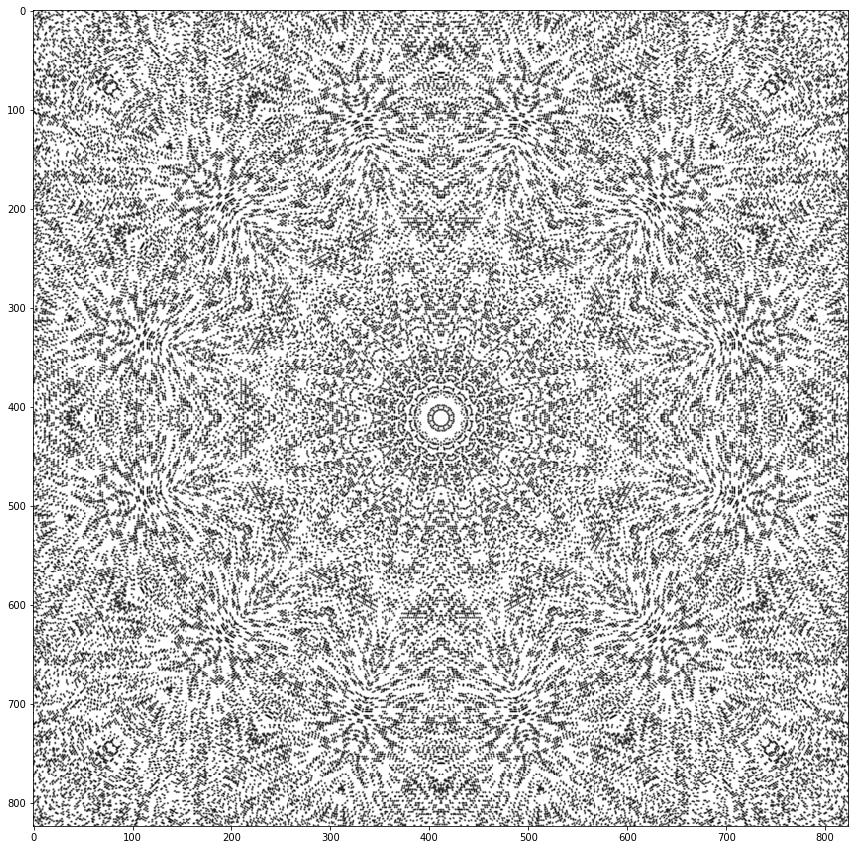

In [21]:
# input image
input_image = cv.imread('input.png')
plt.figure(figsize=(15,15))
plt.imshow(input_image)

In [14]:
filters = build_filters()
result = process_threaded(input_image, filters)

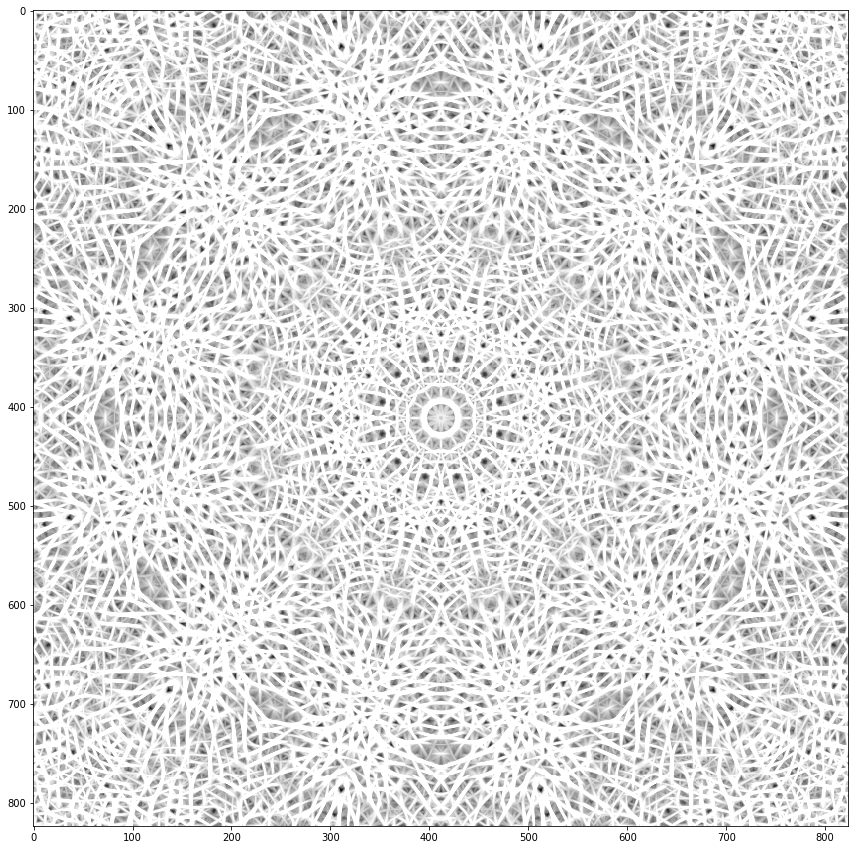

In [23]:
plt.figure(figsize=(15,15))
plt.imshow(result)

In [24]:
cv.imwrite("output.png", result)

True